# Result_experimentKW26

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path, PurePath
import os
import numbers
from scipy.stats.mstats import gmean

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 600 #Changes the number of rows diplayed (default is 60)

## Experiment Summary

Change the following variable to the `score.csv` with the result of the experiment:

In [2]:
experimentCSVPath = PurePath("CDTDRI0.2GD0.8NDTDII5DP5BD170BDF1.05S1.5RS10", 'scores_experiment_kw26_final.csv')

In [3]:
minimumScoreForMeasurement = 5

Loading of results:

In [4]:
experiment = pd.read_csv(experimentCSVPath)

In [5]:
experiment

,DateTime,PlayerName,EpisodeId,Duration,Drag,AverageDistanceToCenter,Supervisor,ModelName,ResetPlatformToIdentity,FocusActivePlatform,Autonomous,AgentChoice,Aborted
0,26.06.2023 09:52:06,12019866,3,30.600510,0.625,2.889354,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
1,26.06.2023 09:52:06,12019866,4,58.741154,0.500,2.966968,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
2,26.06.2023 09:52:06,12019866,5,21.800308,0.675,2.634314,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
3,26.06.2023 09:52:06,12019866,7,88.177216,0.350,2.712997,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
4,26.06.2023 09:52:06,12019866,9,20.580280,0.675,2.931515,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,31.08.2023 13:31:29,player23,6,4.839996,0.750,3.738486,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False
1081,31.08.2023 13:31:29,player23,7,3.539997,0.775,4.182016,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False
1082,31.08.2023 13:31:29,player23,8,3.659997,0.775,3.949201,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False
1083,31.08.2023 13:31:29,player23,9,12.600099,0.725,3.809315,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False


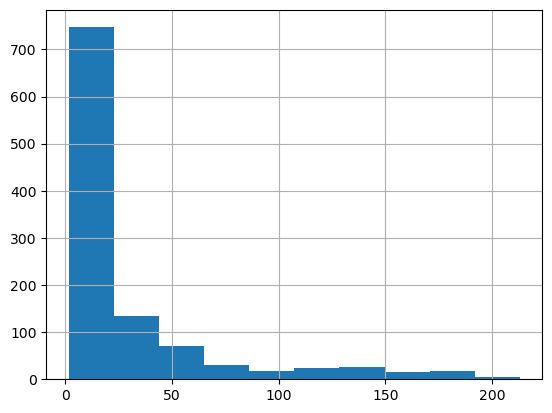

In [6]:
experiment['Duration'].hist()
plt.show()

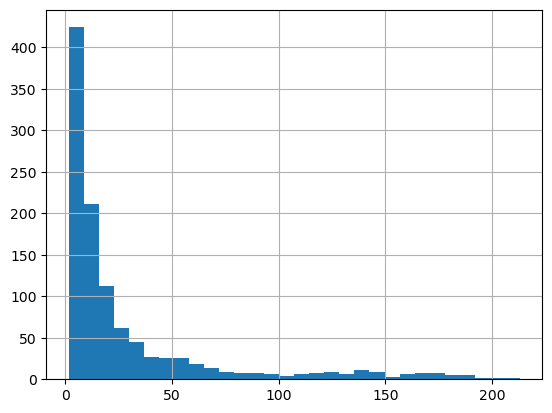

In [7]:
experiment['Duration'].hist(bins=30)
plt.show()

## Results

In [8]:
experiment = experiment[experiment['Aborted'] == False]
experiment = experiment[experiment['Duration'] >= minimumScoreForMeasurement]
experiment = experiment.replace("AUIAUI1S5MunifiedD1_ev1_session19_AOD23_DRI0.2NTTT", "AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2NTTT")
experiment = experiment.replace("AUIAUI1S5MunifiedD1_ev1_session19_AOD23_DRI0.2NTTTN", "AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2NTTTN")

In [9]:
experimentDict = {}

experimentDict['Total'] = experiment

for name in experiment['PlayerName']:
    experimentDict[name] = experiment[experiment['PlayerName'] == name]

In [10]:
experiment

,DateTime,PlayerName,EpisodeId,Duration,Drag,AverageDistanceToCenter,Supervisor,ModelName,ResetPlatformToIdentity,FocusActivePlatform,Autonomous,AgentChoice,Aborted
0,26.06.2023 09:52:06,12019866,3,30.600510,0.625,2.889354,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
1,26.06.2023 09:52:06,12019866,4,58.741154,0.500,2.966968,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
2,26.06.2023 09:52:06,12019866,5,21.800308,0.675,2.634314,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
3,26.06.2023 09:52:06,12019866,7,88.177216,0.350,2.712997,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
4,26.06.2023 09:52:06,12019866,9,20.580280,0.675,2.931515,True,AUIAUI1S2.5MsessionOptS20_DRI0.2NTTT,True,False,False,Ball3DAgentOptimal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,31.08.2023 13:31:29,player23,2,13.780126,0.725,3.313310,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False
1077,31.08.2023 13:31:29,player23,3,9.220021,0.750,3.061042,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False
1079,31.08.2023 13:31:29,player23,5,14.220136,0.725,3.411845,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False
1083,31.08.2023 13:31:29,player23,9,12.600099,0.725,3.809315,True,AUIAUI1S5MunifiedD1_ev1_session19_AOD1_DRI0.2N...,True,False,False,Ball3DAgentOptimal,False


Dividing into different models:

In [11]:
def getResults(experimentDict, dateTimeExpression='(value[\'DateTime\'] > \'26.06.2023\')', normalize=False, meanFunc=np.mean):
    resultDict = {}
    columns = ['Duration', 'AverageDistanceToCenter']

    for column in columns:
        for key, value in experimentDict.items():
            dfs = {}

            if key not in resultDict:
                resultDict[key] = {}

            for modelName in value['ModelName'].unique():
                df = value[eval(dateTimeExpression)]
                df = df[df['ModelName'] == modelName][[column, 'PlayerName']].set_index('PlayerName')#.reset_index(drop=True)

                modelName = modelName.replace("AUI1", "")
                modelName = modelName.replace("AUI", "")
                modelName = modelName.replace("solo", "")
                dfs[modelName] = df

            resultDict[key][column] = pd.concat(dfs, axis=1, sort=False)
            resultDict[key][column] = resultDict[key][column].rename(columns={"NoSupervisor": "No Supervisor", "S2.5MsessionOptS20_DRI0.2NTTT": "No Constraints", "S5MunifiedD1_ev1_session19_AOD1_DRI0.2NTTT": "Cognitive", "S5MunifiedD1_ev1_session19_AOD1_DRI0.2NTTTN": "Notification"})  
            resultDict[key][column] = resultDict[key][column].droplevel(1, axis=1)

            if normalize and key == 'Total':
                resultDict[key][column] = resultDict[key][column].groupby('PlayerName', group_keys=False).apply(lambda x: x/x.max().max()).groupby('PlayerName').agg(meanFunc)
            elif key == 'Total':
                resultDict[key][column] = resultDict[key][column].groupby('PlayerName').agg(meanFunc)
                
    return resultDict

# Geometric Mean

In [12]:
resultDictGmean = getResults(experimentDict, '~((value[\'DateTime\'] > \'27.06.2023\') & (value[\'DateTime\'] < \'28.06.2023\'))',  meanFunc=gmean)

In [13]:
resultDictGmean['Total']['AverageDistanceToCenter']

,No Constraints,Cognitive,Notification,No Supervisor
PlayerName,,,,
01349068,3.102192,3.011326,3.317082,3.258463
01428736,3.233231,3.301407,3.655003,3.236637
01528584,2.935465,3.081607,3.057006,3.162544
01529890,2.915391,3.158986,3.147566,3.270482
01634250,2.847480,2.821894,3.169551,3.042173
11739847,3.042973,2.966026,3.066013,3.112114
11808607,2.941861,2.983688,3.210196,3.282009
11839259,2.797588,2.916316,3.396143,3.400864
11904652,3.196679,2.948378,3.158330,3.416346


In [14]:
resultDictGmean['Total']['Duration']

,No Constraints,Cognitive,Notification,No Supervisor
PlayerName,,,,
01349068,13.059848,44.551425,10.051339,16.782281
01428736,12.662924,20.628292,7.195055,13.250621
01528584,9.347058,16.982934,28.654299,15.228621
01529890,14.475412,24.240113,24.328120,19.868722
01634250,17.224799,18.288131,17.756827,13.593702
11739847,19.094289,40.949620,20.568327,32.579849
11808607,25.655915,24.459987,15.024105,15.484064
11839259,23.436850,32.895604,10.551372,15.671012
11904652,17.024974,45.606654,17.774706,21.305917


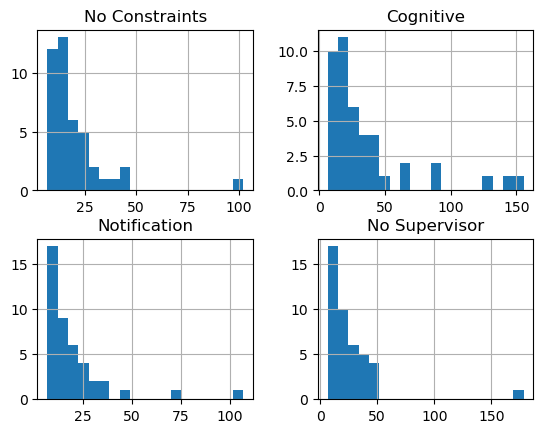

In [15]:
resultDictGmean['Total']['Duration'].hist(bins=19)
plt.show()

In [16]:
resultDictGmean['Total']['Duration'].describe()

,No Constraints,Cognitive,Notification,No Supervisor
count,43.000000,43.000000,43.000000,43.000000
mean,19.710608,36.294485,20.032620,25.999514
std,16.105421,35.171519,18.471344,27.052602
min,6.912245,6.356255,7.024604,6.554897
25%,11.301387,15.070591,9.875698,11.686205
50%,14.475412,22.573503,13.785021,18.696296
75%,24.019038,40.979847,23.343389,33.365431
max,101.979747,155.574523,106.874606,178.281467


In [17]:
resultDictGmean['Total']['Duration'].to_csv(PurePath(Path(os.getcwd()), 'Result_experimentKW26_gmean.csv'))

In [18]:
resultDictGmean['Total']['AverageDistanceToCenter'].to_csv(PurePath(Path(os.getcwd()), 'ResultDistance_experimentKW26_gmean.csv'))

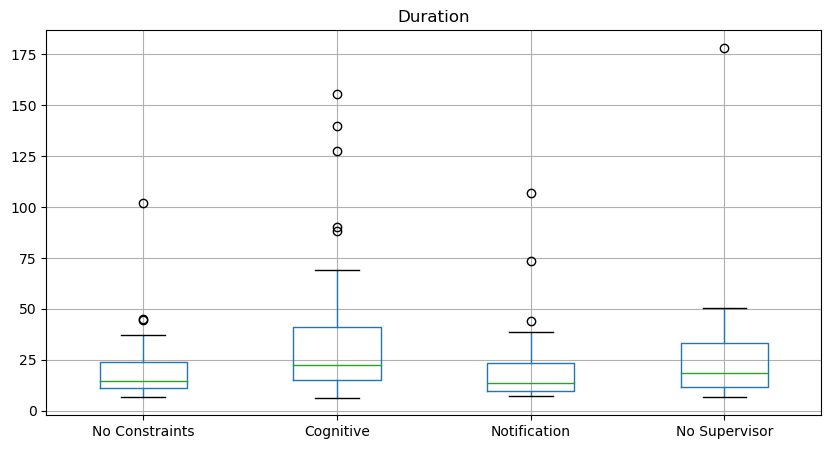

In [19]:
resultDictGmean['Total']['Duration'].boxplot(figsize=(10,5))
plt.title('Duration')
plt.show()

In [20]:
resultDictGmean['Total']['Duration'].describe()

,No Constraints,Cognitive,Notification,No Supervisor
count,43.000000,43.000000,43.000000,43.000000
mean,19.710608,36.294485,20.032620,25.999514
std,16.105421,35.171519,18.471344,27.052602
min,6.912245,6.356255,7.024604,6.554897
25%,11.301387,15.070591,9.875698,11.686205
50%,14.475412,22.573503,13.785021,18.696296
75%,24.019038,40.979847,23.343389,33.365431
max,101.979747,155.574523,106.874606,178.281467


## Normalized

In [21]:
resultDictNorm = getResults(experimentDict, '~((value[\'DateTime\'] > \'27.06.2023\') & (value[\'DateTime\'] < \'28.06.2023\'))', True, meanFunc=gmean)

In [22]:
resultDictNorm['Total']['Duration']

,No Constraints,Cognitive,Notification,No Supervisor
PlayerName,,,,
01349068,0.161835,0.552073,0.124554,0.207963
01428736,0.207449,0.337940,0.117872,0.217077
01528584,0.133262,0.242128,0.408529,0.217117
01529890,0.128359,0.214946,0.215726,0.176183
01634250,0.284608,0.302177,0.293398,0.224611
11739847,0.150526,0.322817,0.162146,0.256836
11808607,0.258276,0.246237,0.151246,0.155877
11839259,0.171482,0.240689,0.077202,0.114661
11904652,0.148285,0.397226,0.154815,0.185571


In [23]:
resultDictNorm['Total']['Duration']

,No Constraints,Cognitive,Notification,No Supervisor
PlayerName,,,,
01349068,0.161835,0.552073,0.124554,0.207963
01428736,0.207449,0.337940,0.117872,0.217077
01528584,0.133262,0.242128,0.408529,0.217117
01529890,0.128359,0.214946,0.215726,0.176183
01634250,0.284608,0.302177,0.293398,0.224611
11739847,0.150526,0.322817,0.162146,0.256836
11808607,0.258276,0.246237,0.151246,0.155877
11839259,0.171482,0.240689,0.077202,0.114661
11904652,0.148285,0.397226,0.154815,0.185571


In [24]:
resultDictNorm['player9']['Duration']

,Notification,No Constraints,Cognitive,No Supervisor
PlayerName,,,,
player9,6.499995,166.398727,128.110550,10.320046
player9,9.320024,74.479515,191.844162,15.380162
player9,7.059994,22.720330,52.761017,195.785000
player9,37.160660,16.040176,175.020569,173.320200
player9,28.080452,38.100680,148.034800,48.960930


In [25]:
resultDictNorm['Total']['Duration'].to_csv(PurePath(Path(os.getcwd()), 'Result_experimentKW26_normalized_gmean.csv'))

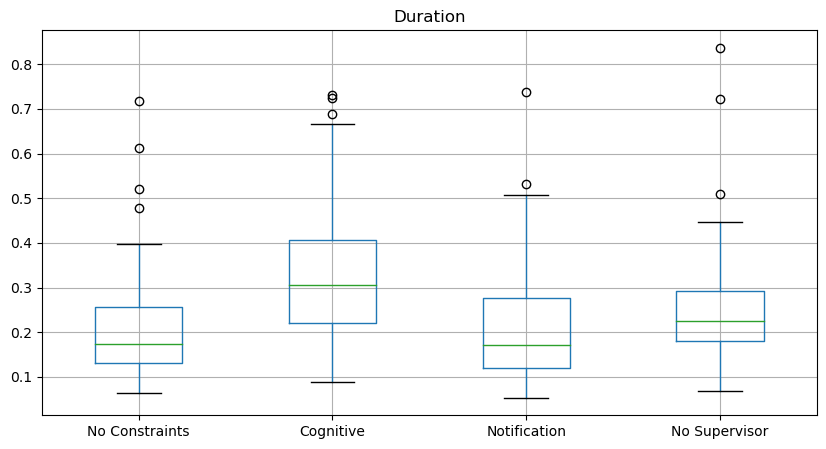

In [26]:
resultDictNorm['Total']['Duration'].boxplot(figsize=(10,5))
plt.title('Duration')
plt.show()

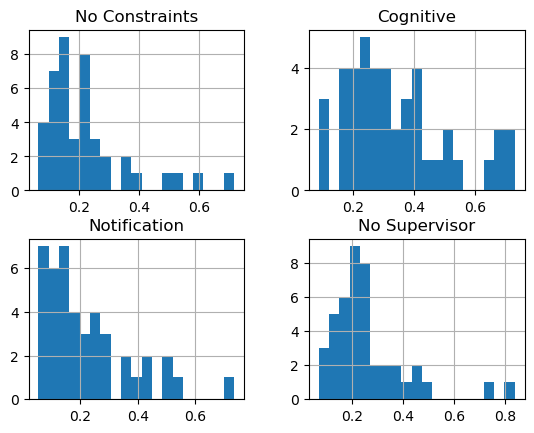

In [27]:
resultDictNorm['Total']['Duration'].hist(bins=19)
plt.show()